In [1]:
import pandas as pd

df = pd.read_csv('c:/data/Data/titanic/data.csv')
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [2]:
len(df.columns)

21

In [3]:
cols=df.columns[1:]
X = df[cols]
y = df['survived']
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2['survived'].value_counts()

0    342
1    342
Name: survived, dtype: int64

In [5]:
X = df2[cols]
y = df2['survived']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=500, random_state=0)
logit.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=0, max_iter=1000)
ann.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [13]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train_scaled, y_train)

SVC(random_state=0)

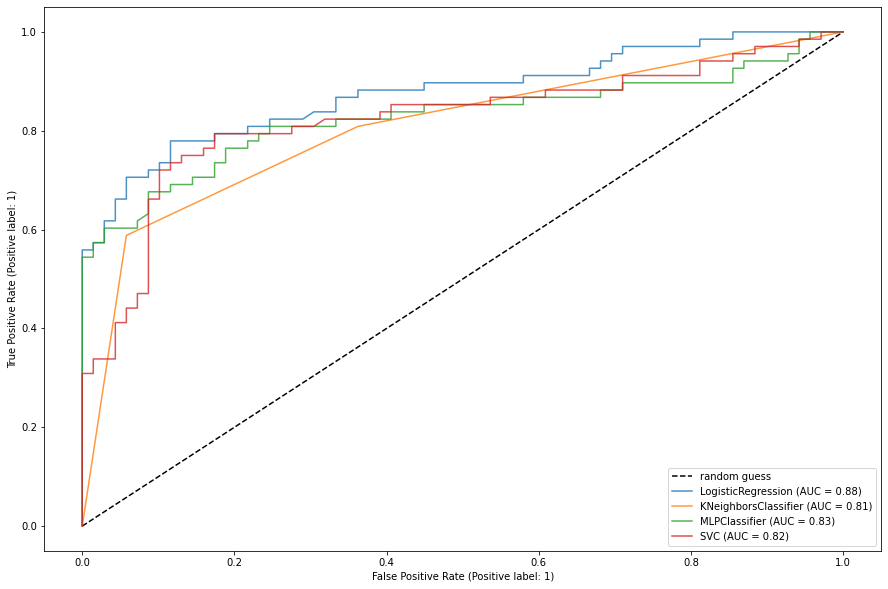

In [14]:
%matplotlib inline
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'k--', label='random guess')
ax = plt.gca()
plot_roc_curve(logit, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(knn, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(ann, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(svm, X_test_scaled, y_test, ax=ax, alpha=0.8)
